
# **OBJECTIVES**


1.   Understand the differences between LIF and HH neuron models.![Picture2.png]
2.   Develop a concept of how to approach modeling a biological question.
3.   Gain a better grasp on the electrophysiology of a neuron, using HH as a model.
4.   Gain experience in Python coding.



# **NOTE**


In each code block the title will say **RUN** or **FILL IN THE BLANK**. When **FILL IN THE BLANK** there will be **BLANK** text indicating where you need to fill in. For each of these, a **code block below will the correct answer**





In [ ]:
#@title RUN

import warnings
warnings.filterwarnings('ignore')

!pip install brian2 > /dev/null
!pip install matplotlib > /dev/null
!pip install ipywidgets > /dev/null

In [ ]:
#@title RUN
from brian2 import *
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output

# **Using a Hodgkin-Huxley model to understand electrophysiology characteristics of a single neuron**

We will first code the Rate Constants. Remember these equations we don't care as much the math just remembering it encodes the quick Na+ and delayed K+.



In [ ]:
#@title RUN - Hodgkin-Huxley Rate Constant Functions

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (np.exp(3.0 - 0.1 * (V + 65)) + 1)

def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)


Using numpy (np.function) allows us to encode for all the numerical methods we need.

We can create functions by using 'def'. Return is what the function encodes

**Now we have functions for all of our Rate Constants to encode for the membrane dynamics**

# **Now we can write down our Hodgkin-Huxley equations!**

**$$C_m \frac{dV}{dt} = I_{\text{ext}} - g_{\text{Na}} m^3 h (V - E_{\text{Na}}) - g_{\text{K}} n^4 (V - E_{\text{K}}) - g_{\text{L}} (V - E_{\text{L}})$$**


**$$\frac{dm}{dt} = \alpha_m(V) \cdot (1 - m) - \beta_m(V) \cdot m
$$**

**$$\frac{dh}{dt} = \alpha_h(V) \cdot (1 - h) - \beta_h(V) \cdot h
$$**

**$$\frac{dn}{dt} = \alpha_n(V) \cdot (1 - n) - \beta_n(V) \cdot n
$$**

Fill in the **"blank"** below



In [ ]:
#@title FILL IN THE BLANK -  Hodgkin-Huxley Equations Function

def HH_derivatives(V, m, h, n, g_Na, g_K, g_L, E_Na, E_K, E_L, I_ext, C_m):
    g_Na_m3h = g_Na * m ** 3 * h
    g_K_n4 = g_K * n ** 4
    g_L = g_L


    dVdt = (1/C_m) * (I_ext - g_Na_m3h * (V - E_Na) - g_K_n4 * (V - E_K) - g_L * (V - E_L))
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n

    return dVdt, dmdt, dhdt, dndt


In [ ]:
#@title ANSWER. Hodgkin-Huxley Equations Function
def HH_derivatives(V, m, h, n, g_Na, g_K, g_L, E_Na, E_K, E_L, I_ext, C_m):
    g_Na_m3h = g_Na * m ** 3 * h
    g_K_n4 = g_K * n ** 4
    g_L = g_L

    dVdt = (1/C_m) * (I_ext - g_Na_m3h * (V - E_Na) - g_K_n4 * (V - E_K) - g_L * (V - E_L))
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n

    return dVdt, dmdt, dhdt, dndt

# **How do we create a simulation with this? We will do this by creating discrete steps and initiating all values. Then we simply run our HH_derivatives equation for each time stamp to update all our params at each step**

In [ ]:
#@title RUN -  HH simulation neuron

import numpy as np
import matplotlib.pyplot as plt

def simulate_HH_neuron(duration, dt, V_init=-65, I_ext=0.1, g_Na=120, g_K=36, g_L=0.3,
                       E_Na=55, E_K=-72, E_L=-49.4, C_m=1):
    timesteps = int(duration / dt)
    time = np.linspace(0, duration, timesteps)
    V = np.zeros(timesteps)
    m = np.zeros(timesteps)
    h = np.zeros(timesteps)
    n = np.zeros(timesteps)

    # Initial conditions for m, h, and n
    V[0] = V_init
    m[0] = alpha_m(V_init) / (alpha_m(V_init) + beta_m(V_init))
    h[0] = alpha_h(V_init) / (alpha_h(V_init) + beta_h(V_init))
    n[0] = alpha_n(V_init) / (alpha_n(V_init) + beta_n(V_init))

    #Now we are going to run the simulation by calculating the individual values at each timestep
    for i in range(1, timesteps):
        dVdt, dmdt, dhdt, dndt = HH_derivatives(V[i - 1], m[i - 1], h[i - 1], n[i - 1],
                                                 g_Na, g_K, g_L, E_Na, E_K, E_L, I_ext, C_m)
        V[i] = V[i - 1] + dt * dVdt
        m[i] = m[i - 1] + dt * dmdt
        h[i] = h[i - 1] + dt * dhdt
        n[i] = n[i - 1] + dt * dndt

    return time, V


 **Now lets make a function to run our simulation. We will call simulate_HH_neuron within it and only need to provide the 1. length of simulation 2. our time steps. Next we will plot them using.**



#**Answer the following questions**
1. What it is happening at each of those timesteps in our simulation?


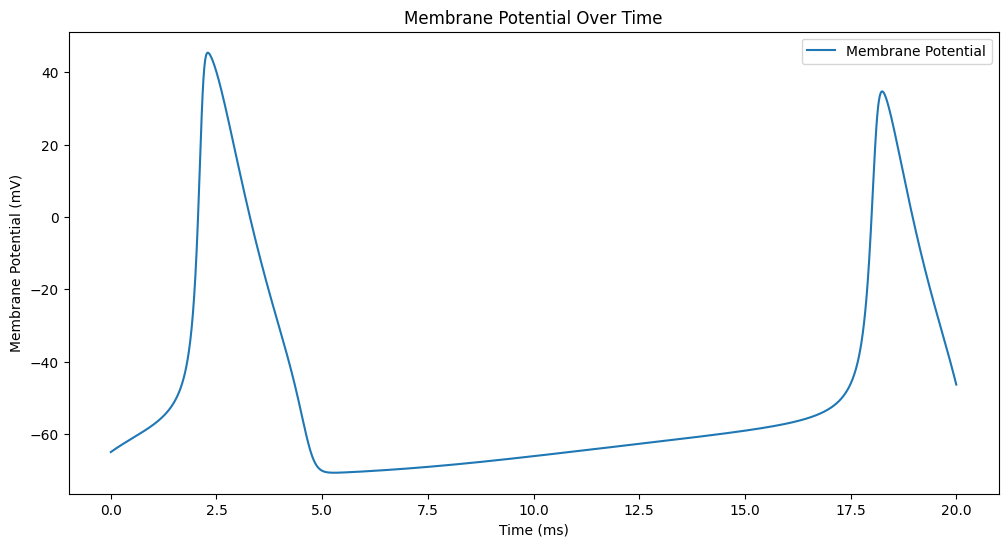

In [ ]:
#@title FILL IN THE BLANK - run the simulation and plot
duration = 20  # 20 milliseconds
dt = 0.01  # time step in milliseconds
time, V = simulate_HH_neuron(duration, dt, V_init=-65, I_ext=5, g_Na=120, g_K=36, g_L=0.3,
                       E_Na=55, E_K=-72, E_L=-49.4, C_m=1)  # Adjust I_ext or other parameters as needed

# Plotting the membrane potential over time
plt.figure(figsize=(12, 6))
plt.plot(time, V, label='Membrane Potential')
plt.title('Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.show()

In [ ]:
#@title ANSWER - run the simulation and plot
duration = 20  # 20 milliseconds
dt = 0.01  # time step in milliseconds
time, V = simulate_HH_neuron(duration, dt, V_init=-65, I_ext=1, C_m=1)  # Adjust I_ext or other parameters as needed

# Plotting the membrane potential over time
plt.figure(figsize=(12, 6))
plt.plot(time, V, label='Membrane Potential')
plt.title('Membrane Potential Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.show()

NameError: name 'alpha_m' is not defined

#**Look at our neuron how does it compare to below**

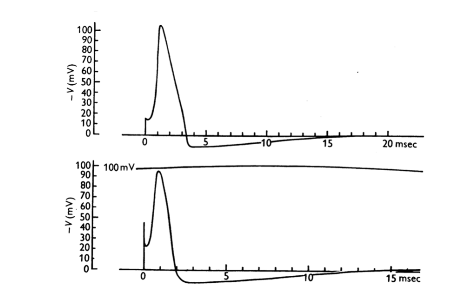

In [ ]:
!wget https://spectra-images-production.s3.amazonaws.com/articles/2022.09.00085/8637e9be-98c8-40fa-b5bb-8240e7efae8b.png -O local_filename.png > /dev/null 2>&1

from IPython.display import Image
Image('local_filename.png')

#**Slide to adjust each parameter**

In [ ]:
#@title - RUN - simulate HH model with interactive slider

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from brian2 import *

# Assuming alpha_m, alpha_h, alpha_n, beta_m, beta_h, beta_n, and HH_derivatives are defined correctly

def simulate_HH_neuron_floater(V_init, I_ext, g_Na, g_K, g_L, E_Na, E_K, E_L, C_m):
    duration = 50  # milliseconds, now fixed inside the function
    dt = 0.01  # time step in milliseconds, also fixed
    timesteps = int(duration / dt)
    time = np.linspace(0, duration, timesteps)
    V = np.zeros(timesteps)
    m = np.zeros(timesteps)
    h = np.zeros(timesteps)
    n = np.zeros(timesteps)

    V[0] = V_init
    m[0] = alpha_m(V_init) / (alpha_m(V_init) + beta_m(V_init))
    h[0] = alpha_h(V_init) / (alpha_h(V_init) + beta_h(V_init))
    n[0] = alpha_n(V_init) / (alpha_n(V_init) + beta_n(V_init))

    for i in range(1, timesteps):
        dVdt, dmdt, dhdt, dndt = HH_derivatives(V[i - 1], m[i - 1], h[i - 1], n[i - 1],
                                                g_Na, g_K, g_L, E_Na, E_K, E_L, I_ext, C_m)
        V[i] = V[i - 1] + dt * dVdt
        m[i] = m[i - 1] + dt * dmdt
        h[i] = h[i - 1] + dt * dhdt
        n[i] = n[i - 1] + dt * dndt

    plt.figure(figsize=(12, 6))
    plt.plot(time, V, label='Membrane Potential')
    plt.title('Membrane Potential Over Time')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.legend()
    plt.show()

# Now, setting up the interactive widget without duration and dt as they are fixed inside the function
interact(simulate_HH_neuron_floater,
         V_init=FloatSlider(min=-100, max=50, step=1, value=-65, description='V_init'),
         I_ext=FloatSlider(min=0, max=20, step=0.1, value=0.1, description='I_ext'),
         g_Na=FloatSlider(min=0, max=200, step=1, value=120, description='g_Na'),
         g_K=FloatSlider(min=0, max=50, step=1, value=36, description='g_K'),
         g_L=FloatSlider(min=0, max=1, step=0.01, value=0.3, description='g_L'),
         E_Na=FloatSlider(min=40, max=70, step=1, value=55, description='E_Na'),
         E_K=FloatSlider(min=-100, max=-50, step=1, value=-72, description='E_K'),
         E_L=FloatSlider(min=-60, max=-40, step=1, value=-49.4, description='E_L'),
         C_m=FloatSlider(min=0.1, max=2, step=0.1, value=1, description='C_m'))


interactive(children=(FloatSlider(value=-65.0, description='V_init', max=50.0, min=-100.0, step=1.0), FloatSli…

<function __main__.simulate_HH_neuron_floater(V_init, I_ext, g_Na, g_K, g_L, E_Na, E_K, E_L, C_m)>

#**Remember that E_ion is the reversal potential of that ion and g_ion is the conductance, which is a proxy for current (Remember our Ohm's law trick?)**

#**Answer the following questions**



1.   What does increasing the sodium conductance do to the neurons firing characteristics? Why?
2.   Move the g_K to 10. What happens to the neuron firing rate? why?

4.   What happens to the neuron firing rate when you increase the the input current? Why?
5. Reset the parameters. Change the E_Na all the way to the right. This is equivalent to increasing the Na amounts outside the neruon. The firing rate increased - why?




# Let's approximate neuronal firing by building a **Leaky Integrate and Fire Neuron**

The differential equation governing the membrane potential **$(V_m)$** of a leaky integrate-and-fire (LIF) neuron model is given by:

$$
\frac{dV_m}{dt} = \frac{-(V_m - V_{rest})}{\tau_m} + \frac{I_{ext}}{C_m}
$$

- **Membrane Potential $(V_m)$**: The electrical potential difference across the neuron's membrane.
- **Resting Potential $(V_{rest})$**: The membrane potential of the neuron at rest.
- **Threshold Potential $(V_{th})$**: The membrane potential at which the neuron fires an action potential.
- **Reset Potential $(V_{reset})$**: The potential to which the membrane potential is reset after an action potential is fired.
- **Leak Conductance $(g_L)$**: The passive permeability of a neuron's membrane to ions, measured by how easily ions can pass through the membrane via leak channels. It is inversely related to the membrane resistance $(R_m)$.
- **Membrane Time Constant $(\tau_m)$**: The time it takes for the membrane potential to reach about 63% of its resting value following a small perturbation. It is defined as the product between the Membrane Resistance $(R_m)$ and Capacitance $(C_m)$, where $C_m$ is the membrane capacitance.
- **Input Current $(I_{ext})$**: External current applied to the neuron.

Solving for $\frac{dV_m}{dt}$, we get:

$$
\frac{dV_m}{dt} = \frac{-(V_m - V_{rest})}{\tau_m} + \frac{I_{ext}}{C_m}
$$

This equation describes how the membrane potential $(V_m)$ of a neuron changes over time in response to an external input current $(I_{ext})$ and the neuron's intrinsic properties, such as its resting potential $(V_{rest})$, membrane time constant $(\tau_m)$, and membrane capacitance $(C_m)$.


#**We are going to use the Brian2 library to assist us. This is a neuron simulation python library that will make setting up our model and running simulations MUCH easier**

In [ ]:
# @title RUN - Define model parameters

from brian2 import *

start_scope()

# Adjusted model parameters
params = {
    'Vm': -70*mV,  # Resting membrane potential
    'I_ext': .5*nA,  # Increased external input current for more depolarization
    'tau_m': 10*ms,  # Membrane time constant
    'C_m': 200*pF,  # Adjusted membrane capacitance to a more realistic value
}

# Additional parameters for simulation
Vr = -75*mV  # Reset potential after spike
Vth = -50*mV  # Threshold potential for spike



Now we will model this neuron with the **differential equation** shown previously that governs the **membrane potential (V)** over **time (t)**.


$$
\frac{dV_m}{dt} = \frac{-(V_m - V_{rest})}{\tau_m} + \frac{I_{ext}}{C_m}
$$


When **membrane potential (V)** reaches **threshold potential (V_threshold)**, the neuron fires an action potential, and the **membrane potential (V)** is reset to the **resting potential (V_rest)**.




Now lets add this **differential equation** to our **brian2 model:**



*   **brian2** takes the equation in the form of **eqs=''' equation goes here: unit'''**
*   In **python** this **'notation'** is used for multi-line string
*   The **unit** is the **SI unit** of the **variable**  defined by the equation, **here is volt**




In [ ]:
# @title FILL IN THE BLANK - Define the model equations

eqs = '''
dV/dt = (-(V - Vm) / tau_m + I_ext / C_m) : volt
'''

In [ ]:
# @title ANSWER - Define the model h
eqs = '''
dV/dt = (-(V - Vm) / tau_m + I_ext / C_m) : volt
'''

# **Initiate NeuronGroup class with equation and parameters**

In [ ]:
# @title RUN - Create a Single Neuron


# Note that brian2 we are going to create a neuron object using "NeuronGroup"
#
# NeuronGroup(number of neurons, equation (hint = eq), threshold (when threshold is met),
#           reset (what the voltage is reset to after going above threshold),
#             method)


# Create a single neuron using these equations
neuron = NeuronGroup(1, eqs, threshold='V > Vth', reset='V = Vr', refractory=5*ms, method='exact')
neuron.V = params['Vm']

# Initialize parameters from the dictionary
neuron.namespace.update(params)

**Great!** now we have our neuron model. **Note** we are adding a refractory period in our **NeuronGroup object** that will not allow **Action Potentials** to occur with 5ms of another **Action Potential**

Lets run a simulation to see if this modelled neuron behaves like **a neuron**

In [ ]:
# @title RUN - brian2 uses the "StateMonitor" to initialize a simulation object

# the StateMonitor(Group(which ojbect to record from), variables(which variables to record from), record(toggle if turned to true to record output))

# Monitor the membrane potential of the neuron and spikes
M = StateMonitor(neuron, 'V', record=True)
spikemon = SpikeMonitor(neuron)

# Run the simulation
run(500*ms)




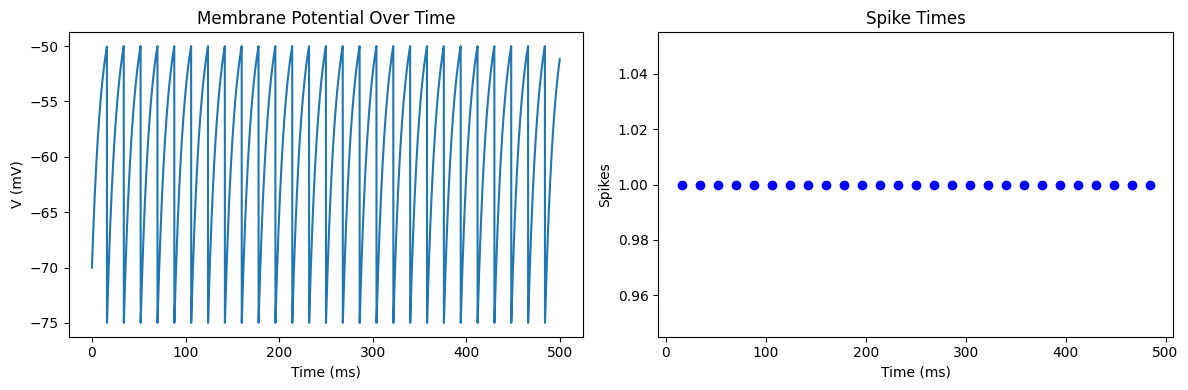

In [ ]:
#@title RUN - plotting membrane potential and firing rate over time


# Plotting
figure(figsize=(12, 4))
subplot(121)
plot(M.t/ms, M.V[0]/mV)
xlabel('Time (ms)')
ylabel('V (mV)')
title('Membrane Potential Over Time')

subplot(122)
plot(spikemon.t/ms, ones(len(spikemon.t)), 'ob')
xlabel('Time (ms)')
ylabel('Spikes')
title('Spike Times')
tight_layout()
show()

#**Lets look at how the different variables impact the firing rate**

In [ ]:
#@title RUN - LIF with interactive slider

# If you're in Google Colab, you might need to install ipywidgets first
# !pip install ipywidgets
# Then, load the extension for horizontal sliders in Colab
# %load_ext google.colab.widgets
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *

def run_simulation_LIF(I_ext, C_m, Vm, tau_m, Vr, Vth):
    start_scope()

    # Convert slider values to correct units
    I_ext = I_ext * pA  # Convert to picoamperes
    C_m = C_m * pF  # Convert to picofarads
    Vm = Vm * mV  # Convert to millivolts
    tau_m = tau_m * ms  # Convert to milliseconds
    Vr = Vr * mV  # Convert to millivolts
    Vth = Vth * mV  # Convert to millivolts

    params = {
        'Vm': Vm,
        'I_ext': I_ext,
        'tau_m': tau_m,
        'C_m': C_m,
    }

    eqs = '''
    dV/dt = (-(V - Vm) / tau_m + I_ext / C_m) : volt
    '''

    neuron = NeuronGroup(1, eqs, threshold='V > Vth', reset='V = Vr', refractory=5*ms, method='exact')
    neuron.V = Vm  # Initialize with the resting membrane potential
    neuron.namespace.update(params)

    M = StateMonitor(neuron, 'V', record=True)
    spikemon = SpikeMonitor(neuron)

    run(500*ms)

    # Plotting membrane potential over time
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(M.t/ms, M.V[0]/mV)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.title('Membrane Potential Over Time')

    # Calculate and plot firing rate per second with 50ms window
    window_size = 100*ms  # Window size for calculating the firing rate
    num_windows = int(np.floor((500*ms) / window_size))
    firing_rates = np.zeros(num_windows)

    for i in range(num_windows):
        start_time = i * window_size
        end_time = start_time + window_size
        spikes_in_window = np.sum((spikemon.t >= start_time) & (spikemon.t < end_time))
        firing_rates[i] = spikes_in_window / (window_size / second)

    time_points = np.arange(num_windows) * window_size/ms + (window_size/ms)/2

    plt.subplot(1, 2, 2)
    plt.plot(time_points, firing_rates, '-o', label='Firing Rate')
    plt.xlabel('Time (ms)')
    plt.ylabel('Firing Rate (spikes/s)')
    plt.title('Firing Rate with 50ms Window')
    plt.ylim(0, 200)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [ ]:
#@title widgets.FloatSlider for visualizing parameters

interact(run_simulation_LIF,
         I_ext=FloatSlider(min=400, max=1000, step=50, value=600, description='I_ext (pA)'),
         C_m=FloatSlider(min=100, max=1000, step=50, value=200, description='C_m (pF)'),
         Vm=FloatSlider(min=-80, max=-60, step=1, value=-70, description='Vm (mV)'),
         tau_m=FloatSlider(min=1, max=20, step=1, value=10, description='tau_m (ms)'),
         Vr=FloatSlider(min=-80, max=-70, step=1, value=-75, description='Vr (mV)'),
         Vth=FloatSlider(min=-55, max=-45, step=1, value=-50, description='Vth (mV)'))


interactive(children=(FloatSlider(value=600.0, description='I_ext (pA)', max=1000.0, min=400.0, step=50.0), Fl…

<function __main__.run_simulation_LIF(I_ext, C_m, Vm, tau_m, Vr, Vth)>

#**Answer the following questions**



1.   Why do the neuron waveforms not look the same?
2.   Following up question 1. Why does the LIF membrane potential have the shape it does?
3.   What happens to the firing rate when you make the Vth (voltage threshold) more positive? Why?
4.   What is the relationship between the Vm (resting membrane potential) and firing rate? Why?
5.   What happens to the neuron firing rate when you increase the the input current?


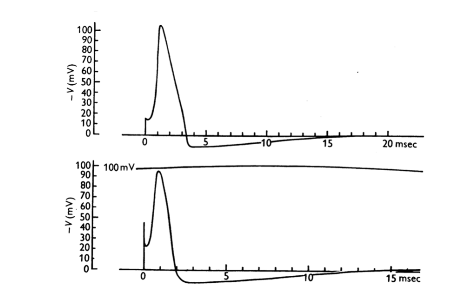

In [ ]:
!wget https://spectra-images-production.s3.amazonaws.com/articles/2022.09.00085/8637e9be-98c8-40fa-b5bb-8240e7efae8b.png -O local_filename.png > /dev/null 2>&1

from IPython.display import Image
Image('local_filename.png')

#**Now lets scale up our network to 1000 neurons!**

In [ ]:
# @title FILL IN THE BLANK - changing the number of neurons


# Note that brian2 we are going to create a neuron object using "NeuronGroup"
#
# NeuronGroup(number of neurons, equation (hint = eq), threshold (when threshold is met),
#           reset (what the voltage is reset to after going above threshold),
#             method)


# Create a single neuron using these equations
neuron = NeuronGroup(1000, eqs, threshold='V > Vth', reset='V = Vr', refractory=5*ms, method='exact')
neuron.V = params['Vm']

# Initialize parameters from the dictionary
neuron.namespace.update(params)

In [ ]:
# @title ANSWER - changing the number of neurons


# Note that brian2 we are going to create a neuron object using "NeuronGroup"
#
# NeuronGroup(number of neurons, equation (hint = eq), threshold (when threshold is met),
#           reset (what the voltage is reset to after going above threshold),
#             method)


# Create a single neuron using these equations
neuron = NeuronGroup(1000, eqs, threshold='V > Vth', reset='V = Vr', refractory=5*ms, method='exact')
neuron.V = params['Vm']

# Initialize parameters from the dictionary
neuron.namespace.update(params)

In [ ]:
# @title RUN - Re-run the state monitor with our update neurons

# the StateMonitor(Group(which ojbect to record from), variables(which variables to record from), record(toggle if turned to true to record output))

# Monitor the membrane potential of the neuron and spikes
M = StateMonitor(neuron, 'V', record=True)
spikemon = SpikeMonitor(neuron)

# Run the simulation
run(500*ms)


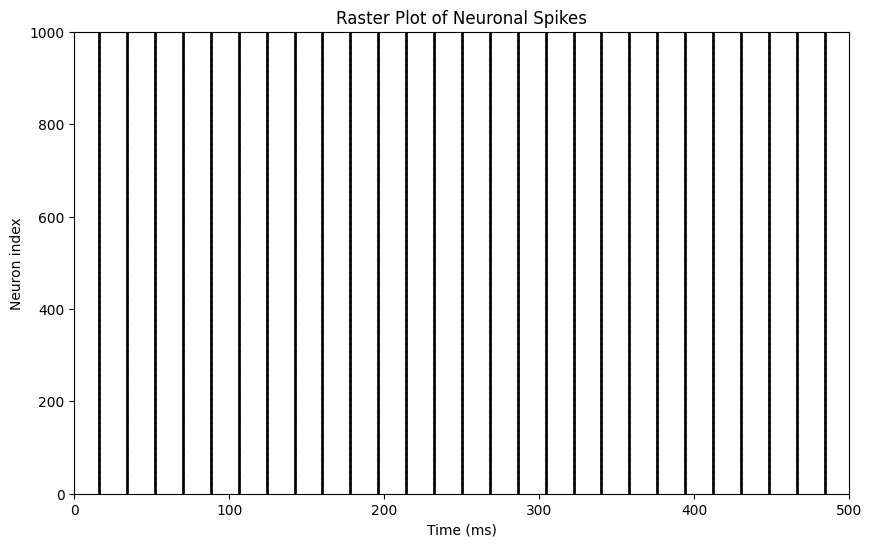

In [ ]:
#@title RUN - Let's plot a raster to look at all the neurons firing rates

import matplotlib.pyplot as plt

# Assuming 'spikemon' is your SpikeMonitor instance
plt.figure(figsize=(10, 6))
plt.plot(spikemon.t/ms, spikemon.i, '.k', ms=1)  # 'i' is the neuron index, 't' is the spike time
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Raster Plot of Neuronal Spikes')
plt.xlim([0, 500])  # Adjust based on your simulation duration
plt.ylim([0, 1000])  # Adjust based on your number of neurons
plt.show()


#**Our Raster looks very stereotyped. This is becuase our input is constant (not noisy) and all the neurons behave equally. Lets alter our input to be more "complex"**

We will do this by:


1.   Make our LIF neuron Vm more noisy
2.   Make the input current noisy
2.   Make the input current somewhat oscillatory




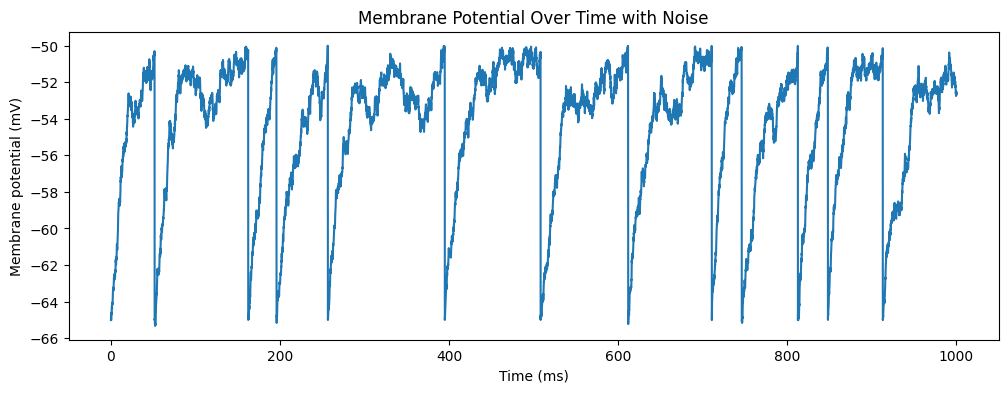

In [ ]:
from brian2 import *

start_scope()

duration = 1*second  # Total simulation time

# LIF neuron parameters
Cm = 200*pF  # Membrane capacitance
gleak = 10*nS  # Leak conductance
Eleak = -70*mV  # Leak reversal potential (resting potential)
Vreset = -65*mV  # Reset potential after a spike
Vth = -50*mV  # Threshold potential
Iext = 200*pA  # External current
sigma = 1*mV  # Standard deviation of membrane potential noise (as voltage)
tau_noise = 10*ms  # Time constant for noise

# Equation for the LIF model with corrected noise incorporation
eqs = '''
dV/dt = (gleak*(Eleak-V) + Iext)/Cm + (sigma*xi*sqrt(2*tau_noise))/tau_noise : volt
'''

# Create a neuron group
neurons = NeuronGroup(1, eqs, threshold='V>Vth', reset='V=Vreset', refractory=5*ms, method='euler')
neurons.V = Vreset  # Initialize membrane potential

# Monitor variables
M = StateMonitor(neurons, 'V', record=True)
spikemon = SpikeMonitor(neurons)

# Run the simulation
run(duration)

# Plotting
figure(figsize=(12, 4))
plot(M.t/ms, M.V[0]/mV)
xlabel('Time (ms)')
ylabel('Membrane potential (mV)')
title('Membrane Potential Over Time with Noise')
show()



#**Answer the question**

1. What is the difference between the above trace from our noisy LIF and the previous LIF?

WARNING    'V' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value array([-65.        , -64.91613408, -64.83283615, ..., -45.40808991,
       -45.87455797, -46.34428174]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


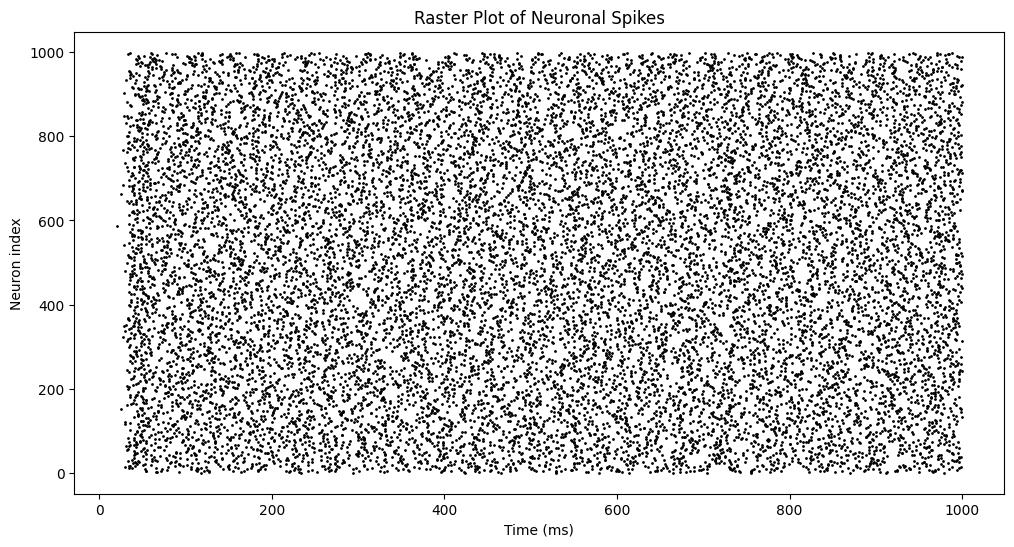

In [ ]:
from brian2 import *

start_scope()

duration = 1*second  # Total simulation time

# LIF neuron parameters
num_neurons = 1000  # Number of neurons
Cm = 200*pF  # Membrane capacitance
gleak = 10*nS  # Leak conductance
Eleak = -70*mV  # Leak reversal potential (resting potential)
Vreset = -65*mV  # Reset potential after a spike
Vth = -50*mV  # Threshold potential
Iext = 200*pA  # External current
sigma = 1*mV  # Standard deviation of membrane potential noise (as voltage)
tau_noise = 10*ms  # Time constant for noise

# Equation for the LIF model with corrected noise incorporation
eqs = '''
dV/dt = (gleak*(Eleak-V) + Iext)/Cm + (sigma*xi*sqrt(2*tau_noise))/tau_noise : volt
'''

# Create a neuron group with 1000 neurons
neurons = NeuronGroup(1000, eqs, threshold='V>Vth', reset='V=Vreset', refractory=5*ms, method='euler')
neurons.V = Vreset  # Initialize membrane potential

# Monitor variables
spikemon = SpikeMonitor(neurons)

# Run the simulation
run(duration)

# Plotting the raster plot
figure(figsize=(12, 6))
plot(spikemon.t/ms, spikemon.i, '.k', markersize=2)
xlabel('Time (ms)')
ylabel('Neuron index')
title('Raster Plot of Neuronal Spikes')
show()


#**Now this looks like a realist Raster plot from a Neural Recording**

#**Lets model a Single-Ohmic model. The Wang-Buzsaki model advances the Hodgkin-Huxley model, but is still Single-Ohmic**

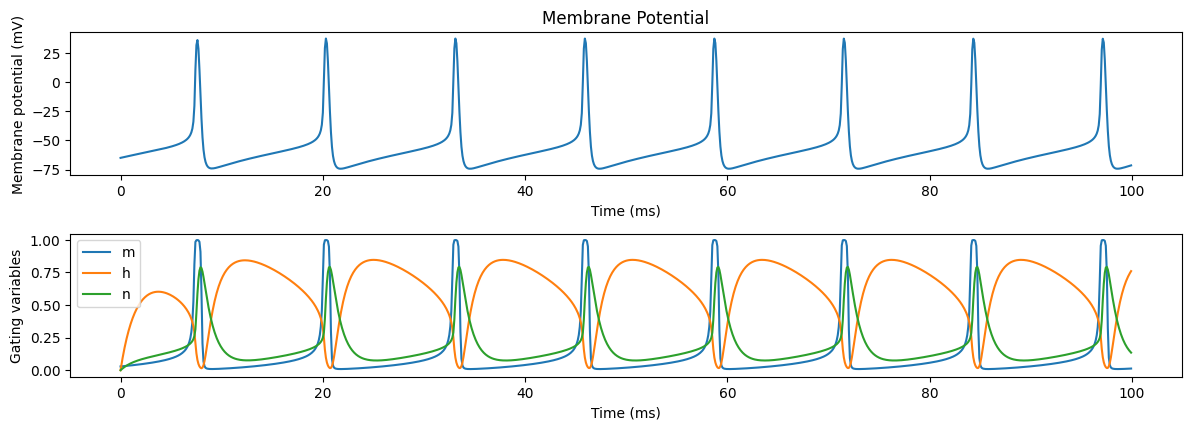

In [ ]:
#@title RUN -Wang Buzsaki model with state variables

from brian2 import *

# Define the simulation parameters
start_scope()

# Neuron model parameters
Cm = 1*uF  # Membrane capacitance per cm^2
Iapp = 2*uA  # Applied current
gL = 0.1*msiemens  # Leak conductance
EL = -65*mV  # Leak reversal potential
ENa = 55*mV  # Sodium reversal potential
EK = -90*mV  # Potassium reversal potential
gNa = 35*msiemens  # Sodium conductance
gK = 9*msiemens  # Potassium conductance

# Neuron equations
eqs = '''
dv/dt = (-gNa*m**3*h*(v-ENa)-gK*n**4*(v-EK)-gL*(v-EL)+Iapp)/Cm : volt
m = alpha_m/(alpha_m+beta_m) : 1
alpha_m = 0.1/mV*10*mV/exprel(-(v+35*mV)/(10*mV))/ms : Hz
beta_m = 4*exp(-(v+60*mV)/(18*mV))/ms : Hz
dh/dt = 5*(alpha_h*(1-h)-beta_h*h) : 1
alpha_h = 0.07*exp(-(v+58*mV)/(20*mV))/ms : Hz
beta_h = 1./(exp(-0.1/mV*(v+28*mV))+1)/ms : Hz
dn/dt = 5*(alpha_n*(1-n)-beta_n*n) : 1
alpha_n = 0.01/mV*10*mV/exprel(-(v+34*mV)/(10*mV))/ms : Hz
beta_n = 0.125*exp(-(v+44*mV)/(80*mV))/ms : Hz
'''

# Create a neuron group
neurons = NeuronGroup(1, eqs, method='exponential_euler')
neurons.v = EL  # Initialize the membrane potential

# Monitor variables
M = StateMonitor(neurons, ['v', 'm', 'h', 'n'], record=True)

# Run the simulation
run(100*ms)

# Plotting
figure(figsize=(12, 8))
subplot(411)
plot(M.t/ms, M.v[0]/mV)
xlabel('Time (ms)')
ylabel('Membrane potential (mV)')
title('Membrane Potential')

subplot(412)
plot(M.t/ms, M.m[0], label='m')
plot(M.t/ms, M.h[0], label='h')
plot(M.t/ms, M.n[0], label='n')
xlabel('Time (ms)')
ylabel('Gating variables')
legend()
tight_layout()
show()


#**Here is plotted the gating variables! Note how m-Na activation is first, followed by n-K activation. H is the refractory period**

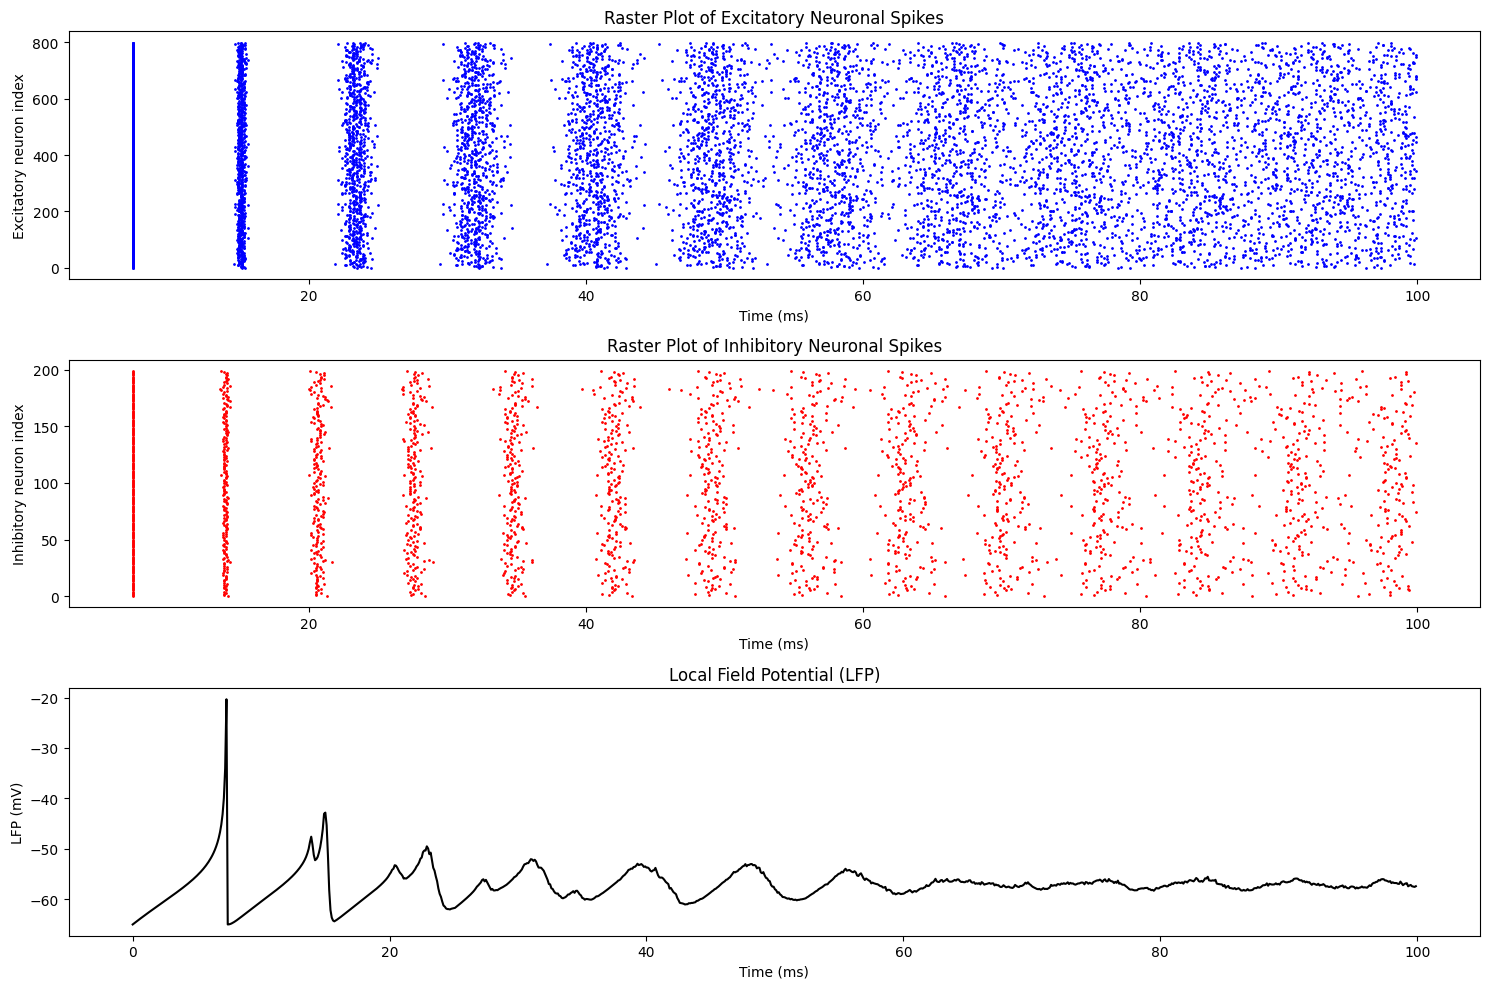

In [ ]:
#@title RUN - a netowrk of excitatory and inibitory neurons

from brian2 import *

start_scope()

duration = 100*ms

# Neuron model parameters
Cm = 1*uF  # Membrane capacitance
gL = 0.1*msiemens  # Leak conductance
EL = -65*mV  # Leak reversal potential
ENa = 55*mV  # Sodium reversal potential
EK = -90*mV  # Potassium reversal potential
gNa = 35*msiemens  # Sodium conductance
gK = 9*msiemens  # Potassium conductance
Iapp = 2*uA  # Applied current

# Synaptic parameters
Ee = 0*mV  # Reversal potential for excitatory inputs
Ei = -80*mV  # Reversal potential for inhibitory inputs
we = 0.1*uS  # Excitatory synaptic weight
wi = 0.4*uS  # Inhibitory synaptic weight
tau_e = 5*ms  # Time constant for excitatory synaptic conductance
tau_i = 10*ms  # Time constant for inhibitory synaptic conductance

# Neuron equations
eqs = '''
dv/dt = (-gNa*m**3*h*(v-ENa)-gK*n**4*(v-EK)-gL*(v-EL)-ge*(v-Ee)-gi*(v-Ei)+Iapp)/Cm : volt
dge/dt = -ge/tau_e : siemens
dgi/dt = -gi/tau_i : siemens
m = alpha_m/(alpha_m+beta_m) : 1
alpha_m = 0.1/mV*10*mV/exprel(-(v+35*mV)/(10*mV))/ms : Hz
beta_m = 4*exp(-(v+60*mV)/(18*mV))/ms : Hz
dh/dt = 5*(alpha_h*(1-h)-beta_h*h) : 1
alpha_h = 0.07*exp(-(v+58*mV)/(20*mV))/ms : Hz
beta_h = 1./(exp(-0.1/mV*(v+28*mV))+1)/ms : Hz
dn/dt = 5*(alpha_n*(1-n)-beta_n*n) : 1
alpha_n = 0.01/mV*10*mV/exprel(-(v+34*mV)/(10*mV))/ms : Hz
beta_n = 0.125*exp(-(v+44*mV)/(80*mV))/ms : Hz
'''

N_exc = 800  # Number of excitatory neurons
N_inh = 200  # Number of inhibitory neurons

exc_neurons = NeuronGroup(N_exc, eqs, threshold='v > 0*mV', reset='v = EL', method='exponential_euler')
inh_neurons = NeuronGroup(N_inh, eqs, threshold='v > 0*mV', reset='v = EL', method='exponential_euler')

exc_neurons.v = EL
inh_neurons.v = EL

# Synapses
S_ee = Synapses(exc_neurons, exc_neurons, on_pre='ge_post += we')
S_ei = Synapses(exc_neurons, inh_neurons, on_pre='ge_post += we')
S_ie = Synapses(inh_neurons, exc_neurons, on_pre='gi_post += wi')
S_ii = Synapses(inh_neurons, inh_neurons, on_pre='gi_post += wi')

S_ee.connect(p=0.1)
S_ei.connect(p=0.2)
S_ie.connect(p=0.2)
S_ii.connect(p=0.1)

# Monitors
exc_spikes = SpikeMonitor(exc_neurons)
inh_spikes = SpikeMonitor(inh_neurons)
exc_V_monitor = StateMonitor(exc_neurons, 'v', record=True)
inh_V_monitor = StateMonitor(inh_neurons, 'v', record=True)

run(duration)

# Calculate the LFP as the weighted average membrane potential
total_neurons = N_exc + N_inh
LFP_exc = np.mean(exc_V_monitor.v[:], axis=0) * (N_exc / total_neurons)
LFP_inh = np.mean(inh_V_monitor.v[:], axis=0) * (N_inh / total_neurons)
LFP = LFP_exc + LFP_inh

# Plotting
figure(figsize=(15, 10))

# Raster plot for excitatory neurons
subplot(311)
plot(exc_spikes.t/ms, exc_spikes.i, '.b', markersize=2)
xlabel('Time (ms)')
ylabel('Excitatory neuron index')
title('Raster Plot of Excitatory Neuronal Spikes')

# Raster plot for inhibitory neurons
subplot(312)
plot(inh_spikes.t/ms, inh_spikes.i, '.r', markersize=2)
xlabel('Time (ms)')
ylabel('Inhibitory neuron index')
title('Raster Plot of Inhibitory Neuronal Spikes')

# LFP plot
subplot(313)
plot(exc_V_monitor.t/ms, LFP/mV, '-k')
xlabel('Time (ms)')
ylabel('LFP (mV)')
title('Local Field Potential (LFP)')

tight_layout()
show()

#**This models an interconnected group of inhibitory and excitatory neurons. Note the syncrhony of the firing patterns! Look at the bottom plot - this is the total voltage of all the neurons. This is similar what we record in Neural Recordings - we call it Local Field Potentials (LFP). We also see the oscillatory activity that this model caputres**